Learning Trigonometric Functions
============================

In [1]:
%matplotlib inline

from math import sin, cos, tan, pi
from pyautospec import FunctionWfa

Sine function
-------------------

We use spectral learning to learn the `sin` function including words of maximum lenght **2** when calculating the Hankel matrix

In [2]:
# learn the sin function in the [0,2π] interval
sin_a = FunctionWfa().fit(sin, x0=0.0, x1=2*pi, learn_resolution=2)

sin_a

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/7 [00:00<?, ?it/s]

Singular values: [3.9599302  2.1123364  1.3496652  0.18813236]


  FunctionWfa(N=4) <built-in function sin>: [0.00,6.28] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └───┘       └─┬─┘       └───┘

         states:   4
  alphabet size:   2
        

note that `sin_a` automaton is very compact: it contains just **4 states**

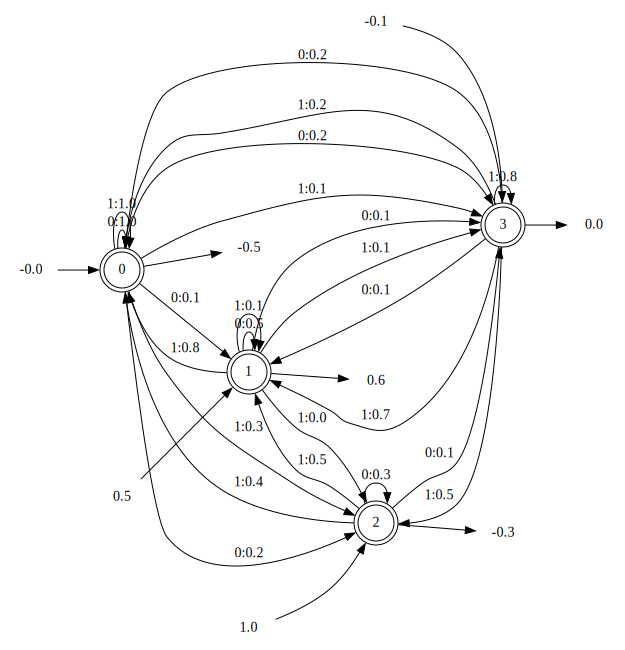

In [3]:
sin_a.model.diagram()

it is not very accurate though

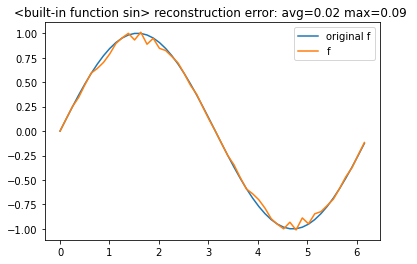

In [4]:
sin_a.comparison_chart()

but we can improve things by **enlarging** the word set used for constructing the Hankel matrix

In [5]:
sin_a = FunctionWfa().fit(sin, x0=0.0, x1=2*pi, learn_resolution=3)

sin_a

  0%|          | 0/15 [00:00<?, ?it/s]

Singular values: [9.5650225e+00 3.6437435e+00 2.1705072e+00 7.2268188e-01 1.1279035e-02
 1.9123845e-03]


  FunctionWfa(N=6) <built-in function sin>: [0.00,6.28] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └───┘       └─┬─┘       └───┘

         states:   6
  alphabet size:   2
        

now the resulting WFA has **6 states**

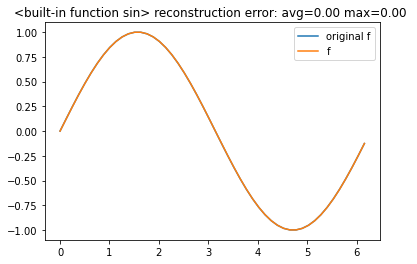

In [6]:
sin_a.comparison_chart()

much better!

The cosine function
----------------------------

In [7]:
# learn the cos function in the [0,2π] interval
cos_a = FunctionWfa().fit(cos, x0=0.0, x1=2*pi, learn_resolution=3)

cos_a

  0%|          | 0/15 [00:00<?, ?it/s]

Singular values: [9.1671209e+00 5.0032587e+00 2.4211259e+00 2.5934252e-01 4.6762321e-02
 4.7052841e-04]


  FunctionWfa(N=6) <built-in function cos>: [0.00,6.28] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └───┘       └─┬─┘       └───┘

         states:   6
  alphabet size:   2
        

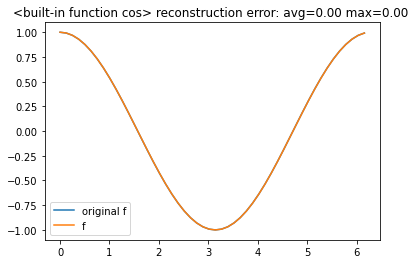

In [8]:
cos_a.comparison_chart()

The tangent function
------------------------------

To learn the `tan` function we need to stay away from the poles and use a larger state set

In [9]:
# learn the tan function in the (-π/2,+π/2) interval
d = 0.05
tan_a = FunctionWfa().fit(tan, x0=-pi/2+d, x1=pi/2-d, learn_resolution=5)

tan_a

  0%|          | 0/63 [00:00<?, ?it/s]

Singular values: [2.0891847e+02 9.9025017e+01 3.5414032e+01 1.4266031e+01 4.1049352e+00
 1.8697855e+00 4.7236070e-01 2.1689878e-01 4.7902413e-02 2.0828133e-02
 4.4153035e-03]


  FunctionWfa(N=11) <built-in function tan>: [-1.52,1.52] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └───┘       └─┬─┘       └───┘

         states:  11
  alphabet size:   2
        

it has many more states than `sin` and `cos`

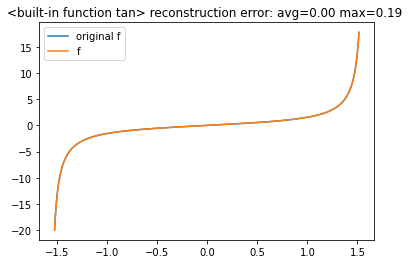

In [10]:
tan_a.comparison_chart(n_points=500)

it reproduces the original function pretty well.

Rapidly Varying
-----------------------

Let's try a more challenging example

In [11]:
def f(x):
    return cos(7*x)*sin(2*x*x - x)
    
f_a = FunctionWfa().fit(f, x0=0, x1=2*pi, learn_resolution=5)

f_a

  0%|          | 0/63 [00:00<?, ?it/s]

Singular values: [2.0524990e+01 1.5152527e+01 1.0442274e+01 8.1010580e+00 5.9778104e+00
 4.7457786e+00 4.2539277e+00 3.7219436e+00 3.4526715e+00 2.5894320e+00
 2.4524572e+00 1.5063171e+00 1.0280756e+00 9.8921603e-01 9.4072121e-01
 1.6575396e-01 3.2158792e-02 5.1371525e-03 9.2499668e-04]


  FunctionWfa(N=19) <function f at 0x64527c3a4040>: [0.00,6.28] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └───┘       └─┬─┘       └───┘

         states:  19
  alphabet size:   2
        

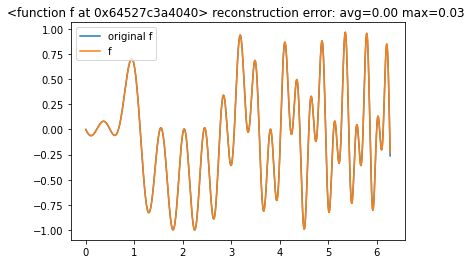

In [12]:
f_a.comparison_chart(n_points=1000)

as expected the WFA has more states, trying different values for `learn_resolution` we get smaller less accurate models